9. [**Gözetimsiz Öğrenme**](#9.-Gözetimsiz-Öğrenme)
    * [a. K-Means](#a.-K-Means)
        * [KMeans - Model Oluşturma](#KMeans---Model-Oluşturma)
        * [KMeans - Model Tuning](#KMeans---Model-Tuning)
    * [b. Hierarchical Clustering](#b.-Hierarchical-Clustering)
        * [HC - Model Oluşturma](#HC---Model-Oluşturma)
        * [HC - Model Tuning](#HC---Model-Tuning)
    * [c. Principal Component Analysis(PCA) - Temel Bileşen Analizi](#c.-Principal-Component-Analysis(PCA)---Temel-Bileşen-Analizi)
        * [PCA - Model Oluşturma](#PCA---Model-Oluşturma)

# **9. Gözetimsiz Öğrenme**

Makine Öğrenmesi modellerinde bağımlı değişkenin elimizde olmadığı durumlarda gözlem birimlerinin bir şekilde anlamlı bir hale getirme çabası olarak nitelendirebileceğimiz gözetimsiz öğrenme modellerine burada değineceğiz. İnceleyeceğimiz modeller ise;
* K-Means
* Hiyerarşik Kümeleme Analizi - Hierarchical Clustering
* Temel Bileşen Analizi - Principal Component Analysis (PCA)

## **a. K-Means**

Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır. Bu aslında clustering yöntemlerinin bir amacıdır. Clustering yöntemlerinde benzerlik matrixleri veya çeşitli uzaklık metrikleri kullanılarak gözlemler veya değişkenler kümelendirilmeye çalışılmaktadır. **Oluşturulmaya çalışan kümelerin kendi içinde homojen, birbirlerine göre ise heterojen olması amaçlanır.** Clustering yöntemleri *hiyerarşik ve hiyerarşik olmayan* yöntemler olarak ikiye ayrılmaktadır. K-Means yöntemi de hiyerarşik olmayan bir clustering yöntemidir.
* K-Means yönteminin gerçek hayattaki yönüyle  hangi iş problemlerinin çözümlerinde kullanıldığına değinirsek, *genelde elimizdeki gözlem birimlerini segmente etmek istediğimizde kulanılır. Somut örnek verecek olursak;
    * Müşteri Segmentasyonu
    * Suç Yerlerinin Belirlenmesi
    * Oyuncu Analizi
    * Dolandırıcılığın Tespit Edilmesi gibi alanlarda yararlanılmaktadır.
* **K-Means Adımları:**
    1. Küme sayısı belirlenir.
    2. Rastgele k merkez seçilir.
    3. Her gözlem için k merkezlere uzaklıklar hesaplanır ve gözlemler kendisine en yakın k merkezine atanır.
    4. Her gözlem en yakın olduğu merkeze yani kümeye atanır.
    5. Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.
    6. Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve kümeiçi hata kareler toplamlarının toplamının (*Total Within-Cluster Variation*) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.
* Burada gözlemler kümeleme işlemi bitinceye kadar farklı kümelere girip çıkabilmektedir.
![image.gif](https://miro.medium.com/max/480/1*4mMckJCPtQNUy7hm8gCLkg.gif)

Buradaki yeni verisetimizde Amerika'daki eyaletlerin suç oranları bulunmaktadır. Bizden istenen bu suç oranlarına göre eyaletleri segmente etmemizdir.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
df = pd.read_csv("csv/USArrests.csv")
df.index = df.iloc[:,0]
df = df.iloc[:,1:]
df.index.name = None

In [3]:
# Eksik gozlemler
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

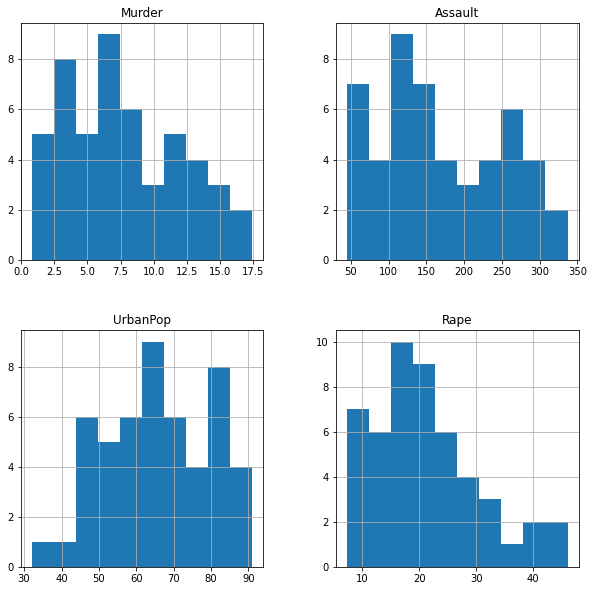

In [6]:
df.hist(figsize=(10,10))

### KMeans - Model Oluşturma

Fonksiyonu kullanmak icin **sklearn.cluster** altindan **KMeans** fonksiyonunu projemize dahil etmemiz gerekiyor.
* Burada odaklanacagimiz iki adet parametre bulunmaktadir.
    * **n_clusters** : kac adet kume olusturacagimizi belirtiriz
    * **n_init** : algoritmanin merkezlere gore kac defa olusturulacagini belirtir.

In [7]:
from sklearn.cluster import KMeans

k_model = KMeans(n_clusters=2).fit(df)

Eger her bir sinifin merkezine ulasmak istersek *cluster_centers_* ile ulasabiliriz. Burada her bir satir bir sinifi temsil etmektedir. 

In [8]:
k_model.cluster_centers_

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

Eger her bir gozlemin hangi sinifta oldugunu ogrenmek istersek *labels_* ile ulasabiliriz.

In [9]:
k_model.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

Kumelenmeyi gorsellestirme islemini gerceklestiriyoruz.

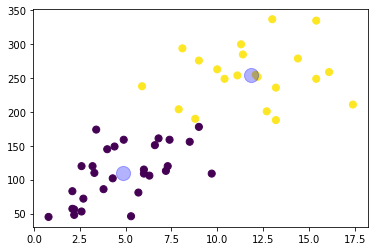

In [10]:
# Gozlemlerin siniflarina gore yerlestirilmesi
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=k_model.labels_,s=50)

# Merkezlerin yerlestirilmesi
plt.scatter(k_model.cluster_centers_[:,0],k_model.cluster_centers_[:,1],c="blue",s=200,alpha=0.3)


Verimiz aslında 4 adet değişkenden oluşuyor fakat biz iki değişken üzerinden görselleştirme işlemini yaptık. Bunun nedeni ise her değişken bir boyut ifade ettiğinden PCA(Temel Bileşen Analizi) uygulayarak boyut indirgemesi gerçekleştirmemiz gerekiyor. Bu işleme daha sonra göz atacağımız için biz kolay olan yoldan yani 4 değişkenin ikisini seçerek görselleştirmeyi gerçekleştirdik.

Şimdi verimizi indirgenme yapılmadan üç boyutta görselleştirme işlemini gerçekleştireceğiz. Bunun için **mpl_toolkits.mplot3d** altından **Axes3D** fonksiyonunu dahil ediyoruz.

In [12]:
k_model = KMeans(n_clusters=3).fit(df)

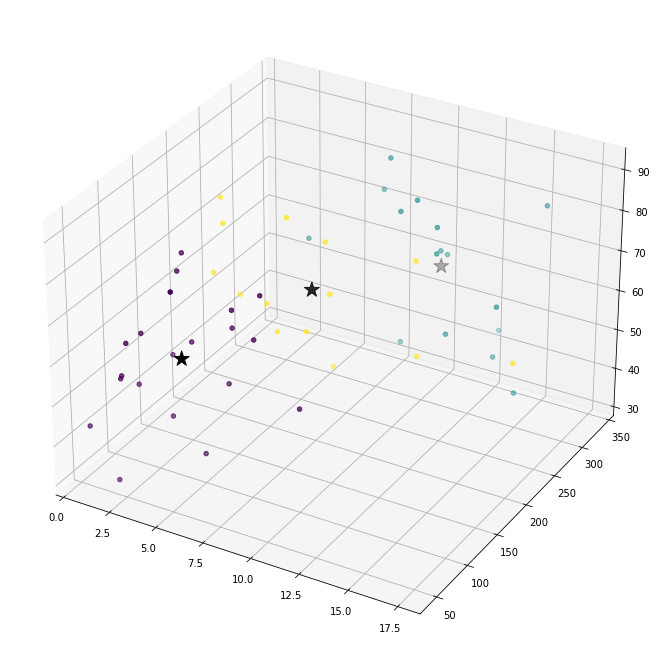

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Noktalarin gorsellestirilmesi
plt.rcParams["figure.figsize"] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2], c= k_model.labels_)


# Kumelerin ve merkezlerin gorsellestirilmesi
ax.scatter(k_model.cluster_centers_[:,0],
           k_model.cluster_centers_[:,1],
           k_model.cluster_centers_[:,2],
          marker="*",
          c="#050505",
          s=250)

In [23]:
df["Kumeler"] = k_model.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Kumeler
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


#### KMeans - Model Tuning

K-Means modelinin optimize edilecek hiperparametresi ise kume sayisidir. Bizim icin onemli olan kumeler ici homojenligin maksimum, kumeler arasi heterojenligin de maksimum olmasidir. K-Means modelinin kume sayisini bulmak izlenen matematiksel yol ise;
* Her bir gozlem biriminin icinde bulundugu kumenin merkezine olan uzakliklarinin hesaplanmasi ve bunu her bir kume icin gerceklestirilmesi.
* Bu sonuclarin toplanmasiyla olusan degere ise SSE dedigimiz hata kareler toplami bulunur. Burada hatadan kastimiz uzaklik olacaktir. 
* Bu degerin degerlendirilmesine gore optimum kume sayisi bulunacaktir.
* Bunun icin cesitli yontemler bulunmaktadir;
    * Elbow Methow
        * Elbow metodu; noktaların her K değerine göre küme merkezine uzaklıklarının karesi toplamı hesaplanmaktadır. Bu değerlere göre her K değeri için grafik çizilmektedir. Grafik üzerinde toplamlar arasındaki farkın azalmaya başladığı dirsek noktası en uygun K değeri olarak belirlenmektedir.
        * 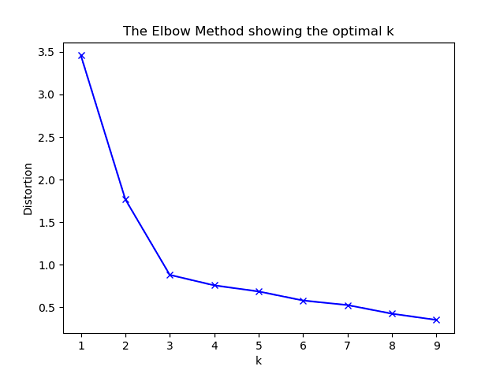
    * Average Silhouette Method
        * Silhoutte metodu; her K değeri için kümelerin farklılığına bakmaktadır. Oluşan kümeler için -1 ve 1 arasında değerler üretmektedir. 1'e en yakın K değeri en uygun olarak belirlenmektedir.
        * 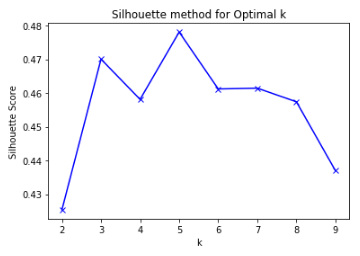
    * GAP Statistic Clustering

* Elbow Metodunu kullanabilmek adina **yellowbrick** adindaki kutuphaneyi install etmemiz gerekiyor.
* Install isleminden sonra **yellowbrick.cluster** altindan **KElbowVisualizer** metodunu projemize dahil etmemiz gerekiyor.
* Daha sonra bu fonksiyondan bir instance olustururken 1. parametreye KMeans modelimizi, 2. parametreye ise k yi hangi aralikta denenecegini soyluyoruz.
* Burada Distortion Score dusuklugu bizim icin iyi olacagi anlamina geliyor. Zaten kume sayisi arttikca her bir gozlem kendi kumesini olusturacagi icin bu sayi git gide dusuyor.

In [24]:
!pip install yellowbrick

Burada gerceklestirdigimiz islem

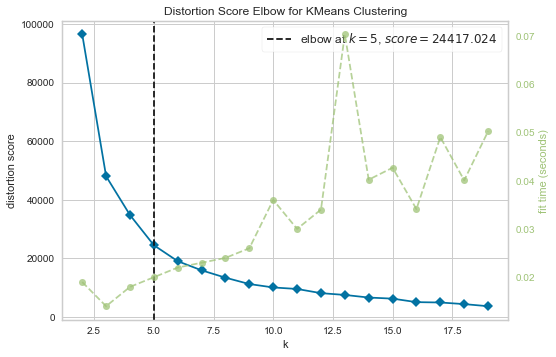

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer

k_model = KMeans()
visualizer = KElbowVisualizer(k_model,k=(2,20))
visualizer.fit(df)
visualizer.poof()

K-Means yontemini bir mekanik hesap icin degil de is bilgisiyle birlikte segmentasyon benzeri islemlerde kullaniyorsak elbow yontemlerinin bize sundugu sonuc bir karar destek noktasidir.

## **b. Hierarchical Clustering**

Gozlemler daha fazla alt sayida kumelere ayrilmak istendiginde kullanilabilir. Temelde veri setini 2ye 3 ve olusan her veri etini tekrardan bolumlenerek bircok segmentasyon olusturulmus olur.
* Asagida gorunen grafik klasik hiyerarsik kumeleme sonucunda olusan yapidir. Buna Cluster Dendrogram denir.
* Burada y ekseninde veri setindeki gozlemler yer almaktadir.
* Burada 4 temel kumeye bolummus fakat her kume kendi icerisinde de bolunmeler gerceklestirmis.
* Hiyerarsik kumeleme yontemleri **Agglomerative (Birlestirici)** ve **Divisive (Bolumleyici)** sekleinte temel olarak ikiye ayrilmaktadir.
    * Divisive
        * Baslangicta sadece bir tane kume vardir, o da tum verisetidir.
        1. Tum gozlemlerin bir arada oldugu kume iki alt kumeye ayrilir.
        2. Olusan yeni kumeler birbirlerine benzemeyen alt kumelere bolunur.
        3. Ayni islem gozlem sayisi kadar kume elde edilinceye kadar tekrar edilir.
    * Agglomerative
        * Baslangicta gozlem sayisi kadar kume vardir.
        1. Verisetinde birbirine en yakin olan iki gozlem bulunur.
        2. Bu iki nokta bir araya getirilerek yeni bir gozlem olusturulur. Yani artik veriseti ilk birlesimdeki gozlemlerden olusmaktadir.
        3. Ayni islem tekrarlanarak yukari dogru cikilir. Yani iki kum,enin birlesiminden olusan bu yeni kumeler ayni sekilde birbirlerine benzerliklerine gore tekrar birlestirilir. Bu islem tum gozlemler tek bir kumede toplanana kadar bu islemler tekrar edilir.
        * Birbirine yakin noktalar uzaklik olculeri kullanarak belirlenir. Bu olculere ornekler verirsek; Eucledian Distance, Manhattan Distance, Correlation etc.
* Hiyerarsik kumelemele yontemlerinde *kume sayisina dendrograma bakarak karar verilir.* Hiyerarsik olmayan kumeleme yontemlerinde ise *kume sayisi uygulama yapilmadan once belirlenir.*
* Hiyerarsik kumeleme yonteminde veriseti gozlemler veya degiskenler bazinda kumeleme islemlerine sokulabilirken, hiyerarsik olmayan yontemlerde ise sadece gozlemlerin kumelenmesi mumkundur.
* Karar agaclarindan farki; karar agaclarinda ayirma islemi hedef degiskene gore yapilirken burada bagimli degisken olmadigi icin gozlemler bagimsiz degiskenler uzerinden yapilan uzaklik hesaplarina gore kumelere ayrilir.
* 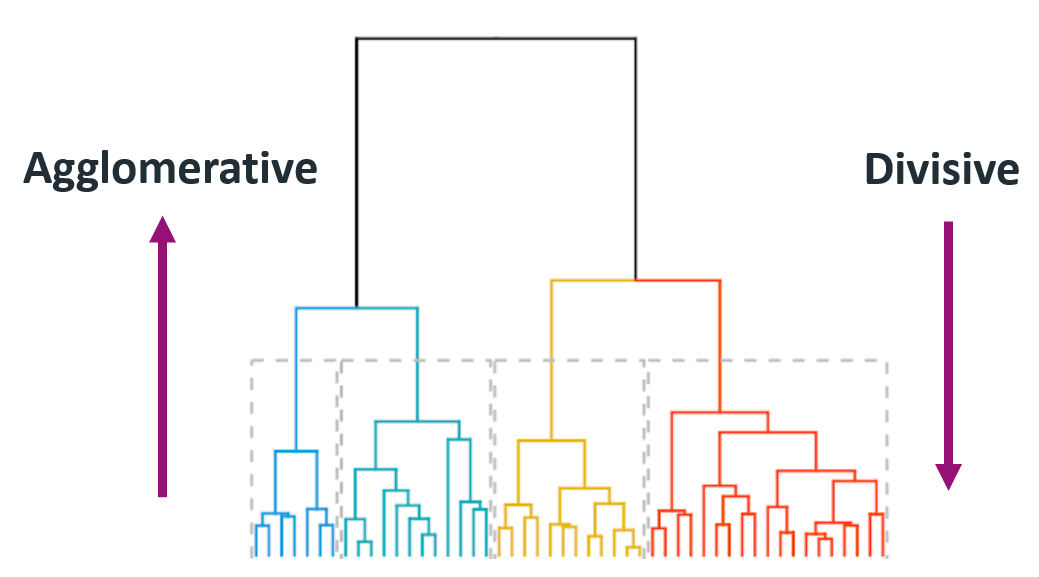

### HC - Model Oluşturma

In [26]:
df = pd.read_csv("csv/USArrests.csv")
df.index = df.iloc[:,0]
df = df.iloc[:,1:]
df.index.name = None

Fonksiyonu kullanmak icin **scipy.cluster.hierarachy** altindan **linkage** fonksiyonunu projemize dahil etmemiz gerekiyor.
* Burada ilk parametremize DataFrame nesnemizi veriyoruz.
* Ikinci parametre olarak hesaplama metotlarindan hangisini kullanmak istedigimizi belirtiyoruz.
    * Dokumantasyon icerisindeki metotlar:
      * **method='single'**   : This is also known as the Nearest Point Algorithm.

      * **method='complete'** : This is also known by the Farthest Point Algorithm or Voor Hees Algorithm.

      * **method='average'**  : This is also called the UPGMA algorithm.

      * **method='weighted'** : This is also called WPGMA.

      * **method='centroid'** : This is also known as the UPGMC algorithm.

      * **method='median'**   :  This is also known as the WPGMC algorithm.

      * **method='ward'** uses the Ward variance minimization algorithm.

In [39]:
from scipy.cluster.hierarchy import linkage

hc_complete = linkage(df,"complete")
hc_average  = linkage(df,"average")
hc_ward   = linkage(df,"ward")

Burada gorsellestirme islemini gerceklestirmek icin yine **scipy.cluster.hierarachy** altindan **dendrogram** fonksiyonunu projemize dahil etmemiz gerekiyor. Burada parametre olarak *linkage* fonksiyonu ile olusturdugumuz instancei vermemiz yeterli oluyor.

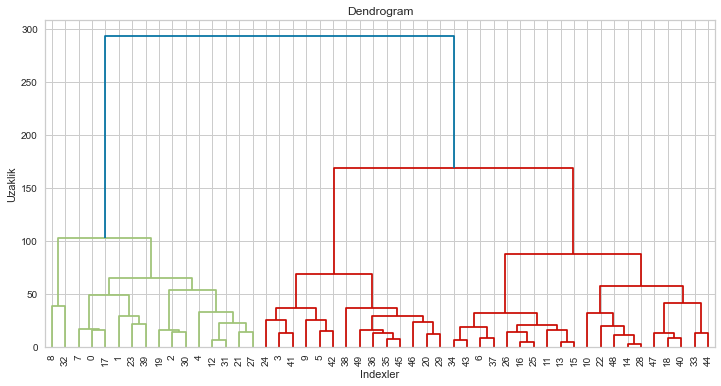

In [41]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,6))
plt.title("Dendrogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")

dendrogram(hc_complete,leaf_font_size=10);

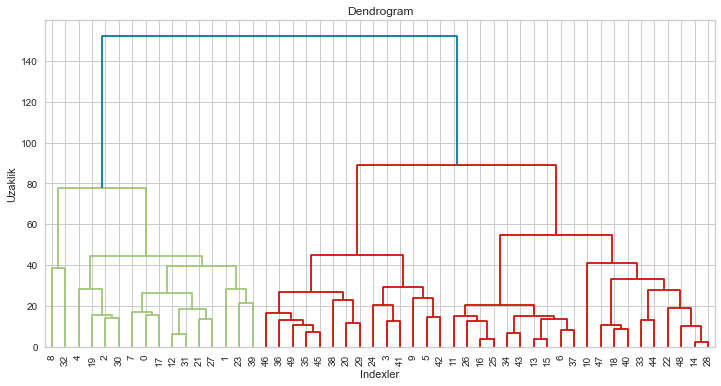

In [42]:
plt.figure(figsize=(12,6))
plt.title("Dendrogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")

dendrogram(hc_average,leaf_font_size=10);

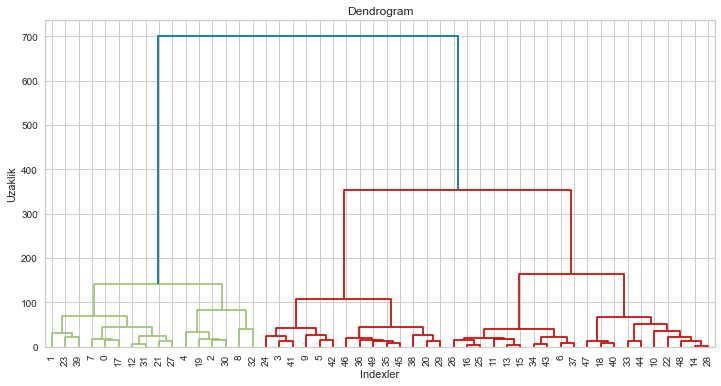

In [43]:
plt.figure(figsize=(12,6))
plt.title("Dendrogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")

dendrogram(hc_ward,leaf_font_size=10);

Yorumlarimizi dendrogram uzerinden yapacagimiz icin bazen genelleme yapabilmek adina dendrogrami budamak(truncate) etmek istebiliriz. Bu islem verecegimiz n sayisi kadar olusmus kumeyi ve icindeki elemanlarini dendrogram uzerinde bize gosterecektir. Bu islemi yapabilmek icin
* dendrogram fonksiyonu icerisine
    * truncate_mode = "lastp"
    * p = kac kume gostermek istiyorsak
    * show_contracted = True parametrelerini vererek islemimizi gerceklestirebiliyoruz.

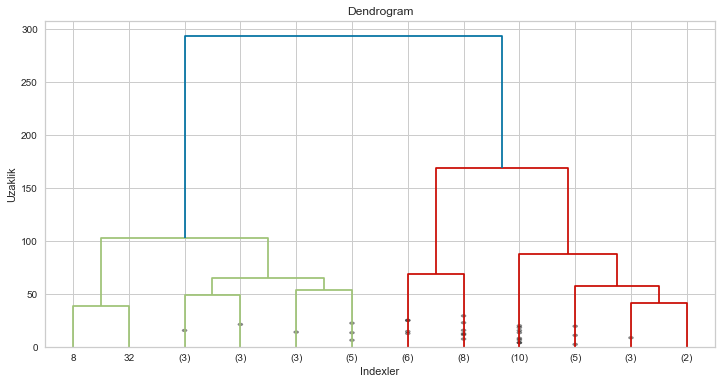

In [38]:
plt.figure(figsize=(12,6))
plt.title("Dendrogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")

dendrogram(hc_complete,
           leaf_font_size=10,
          truncate_mode="lastp",
          p=12,
          show_contracted=True);

#### HC - Model Tuning

Burada optimum kume sayisini dendrogram uzerinden *is bilgimize dayanarak* kendimiz ifade edecegiz. Bu islemi yukaridaki grafikten yorumlarsak, 100 uzakligindan bolumleme gerceklestirdigimizde 5 adet kume sayisi bu  veriseti icin uygun gorunuyor.
* Bu islemi **sklearn.cluster** altindan **AgglomerativeClustering** fonksiyonunu projemize dahil ederek gerceklestiriyoruz.

In [44]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5,
                                 affinity="euclidean",
                                 linkage="ward").fit_predict(df)

In [47]:
df["tune_kume"] = cluster
df.head()

,Murder,Assault,UrbanPop,Rape,tune_kume
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


## **c. Principal Component Analysis(PCA) - Temel Bileşen Analizi**

Tanima,siniflandirma ve goruntu isleme gibi alanlarda boyut indirgeme adina kullanilir. Temel amac yuksek boyutlu verilerde en yuksek varyans ile verisetinin boyutunu indirgemektir. Boyut azalmasiyla kucuk bir miktarda bilgi kaybi kesinlikle yasanacaktir fakat biz bu hatanin minimum durumda olmasini istiyoruz, bunun icin de kaybolan bilginin veriseti hakkinda en az bilgiyi iceren verileri secmemiz gerekmektedir. Yuksek korelasyonlu degiskenleri bir araya getirerek verideki en cok varyansi olusturan daha az sayida yapay degiskenler olusturulur. 
* Temel fikir, cok degiskenli verinin ana ozelliklerini daha az sayida degisken/bilesen ile temsil etmektir. Diger bir ifade ile kucuk miktarda bir bilgi kaybini goze alip degisken boyutunu azaltmaktir.
* Buradaki bilgi kaybi veriseti icerisindeki toplam degiskenliktir.
* Olusan bilesenler arasinda bir korelasyon bulunmamaktadir.
* Degisken gruplarinin varyanslari ifade eden ozdegerler ile verisetindeki degiskenler gruplandirilir. Gruplar arasindaki en fazla varyansa sahip gruplar, en onemli gruplardir ki bunlar da asal bilesenlerdir.
* 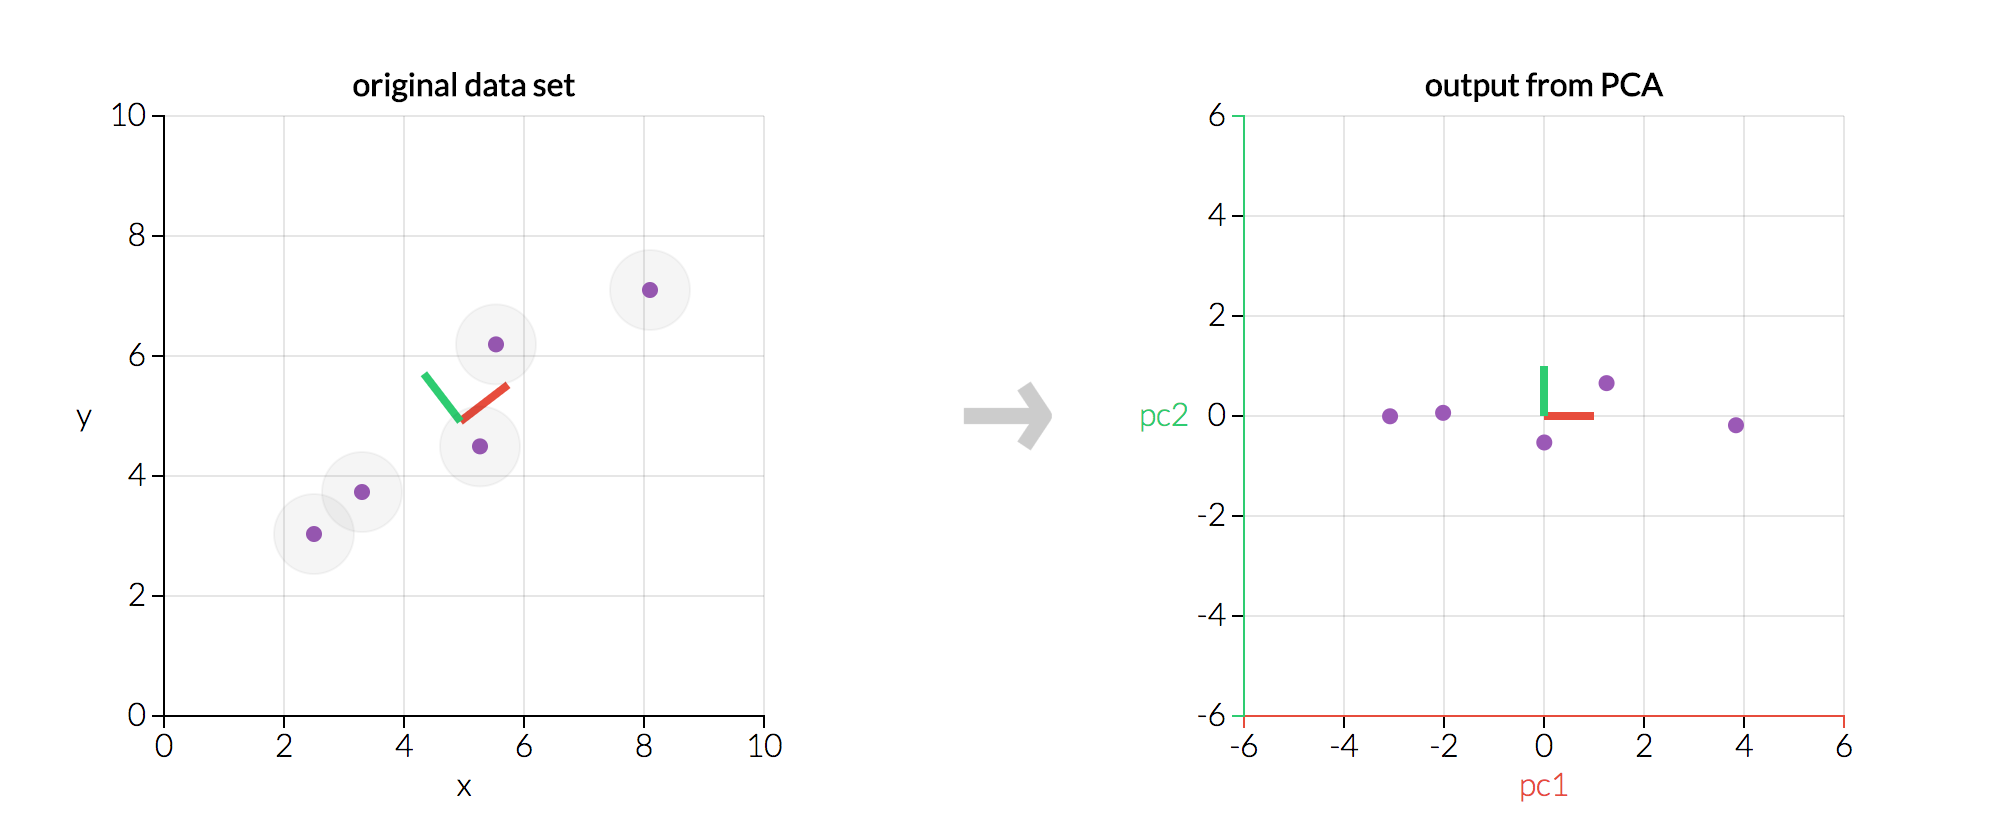

### PCA - Model Oluşturma

In [4]:
import pandas as pd
df = pd.read_csv("csv/USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.index = df.iloc[:,0]
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [6]:
df = df.iloc[:,1:]
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


* PCA'i kullanabilmek icin degiskenleri standartlastirma islemi yapmamiz gerekiyor.
* Fonksiyonu kullanmak icin **sklearn.decomposition** altindan **PCA** fonksiyonunu projemize dahil etmemiz gerekiyor.
    * Burada parametre olarak **n_components** ozelligine, veri setimizi kac degiskenle ifade etmek istedigimizi belirtiyoruz.

In [4]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)

Burada hiperparametre olarak dusunebilecek deger n_components degeridir. Suan is bilgimize dayanarak 2 olarak verdigimizi dusunursek bizim 2 degiskene dusurerek olusturdugumuz asal degiskenler, verilerin toplam varyansinin %86.75'ini koruyabilecegimizi gosteriyor.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

print("varyans :\t",pca.explained_variance_ratio_)
print("toplam varyans :\t",sum(pca.explained_variance_ratio_))

varyans :	 [0.62006039 0.24744129]
toplam varyans :	 0.8675016829223338


Peki bu parametrenin farkli degerlerde gormek istersek ne yapariz? Bunun cevabi da asagida ehehe

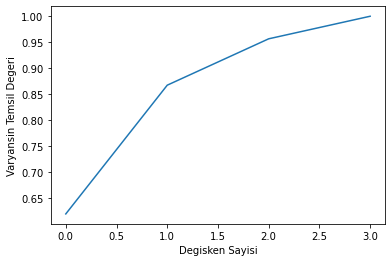

In [21]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Degisken Sayisi")
plt.ylabel("Varyansin Temsil Degeri")
plt.show();

In [52]:
df_pc = pd.DataFrame(pca.explained_variance_ratio_.reshape(1,4))
df_pc.columns = ["PC1","PC2","PC3","PC4"]
df_pc

,PC1,PC2,PC3,PC4
0,0.62006,0.247441,0.089141,0.043358


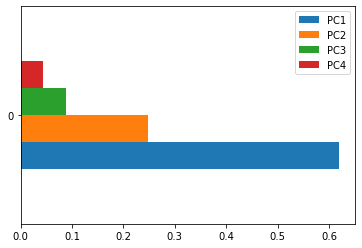

In [55]:
df_pc.plot.barh();